Unsupervised Silhouette (S) Scores</br>
- Finds the best performing models based on Silhouette scores of clusterings, both overall and by model type.
Creates a sensitivity analysis plot of the hyperparameters for the best performing model.
- Dependencies: Unsupervised_Clusters.ipynb (S_Scores.p)</br></br>


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np


In [17]:
def top_n_scores (type='norm', n=10):
    '''Input: type = raw or normalized
    n = number of top scores to return
    Output: df with n top silhouette scores for data type'''
    with open('S_Scores.p', 'rb') as f:
        S_Scores = pickle.load(f)
    
    top_scores = S_Scores[type].iloc[:n][['Model', 'params', 's_score', 'k']]

    return top_scores

In [18]:
#Top 5 Models by S_Score on Normalized Data
top_n_scores('norm',13)

,Model,params,s_score,k
0,H,"{'link': 'single', 'dist': 0.043000000000000003}",0.809829,4
1,H,"{'link': 'single', 'dist': 'None'}",0.809829,4
2,H,"{'link': 'average', 'dist': 0.088}",0.785676,4
3,H,"{'link': 'average', 'dist': 'None'}",0.785676,4
4,H,"{'link': 'average', 'dist': 'None'}",0.776311,5
5,H,"{'link': 'average', 'dist': 0.07900000000000001}",0.776311,5
6,H,"{'link': 'complete', 'dist': 0.16}",0.731336,5
7,H,"{'link': 'complete', 'dist': 0.196}",0.731336,5
8,H,"{'link': 'complete', 'dist': 0.17800000000000002}",0.731336,5
9,H,"{'link': 'complete', 'dist': 0.18700000000000003}",0.731336,5


In [19]:
#Top 13 Models by S_Score on Normalized Data
top_n_scores('raw',13)

,Model,params,s_score,k
0,KM,"{'init': 'k-medoids++', 'max_iter': 276}",0.877353,3
1,KM,"{'init': 'k-medoids++', 'max_iter': 126}",0.877353,3
2,KM,"{'init': 'k-medoids++', 'max_iter': 76}",0.877353,3
3,KM,"{'init': 'k-medoids++', 'max_iter': 51}",0.877353,3
4,KM,"{'init': 'k-medoids++', 'max_iter': 26}",0.877353,3
5,KM,"{'init': 'k-medoids++', 'max_iter': 151}",0.877353,3
6,KM,"{'init': 'k-medoids++', 'max_iter': 176}",0.877353,3
7,KM,"{'init': 'k-medoids++', 'max_iter': 201}",0.877353,3
8,KM,"{'init': 'k-medoids++', 'max_iter': 226}",0.877353,3
9,KM,"{'init': 'k-medoids++', 'max_iter': 251}",0.877353,3


In [20]:
def top_model_scores (type='norm'):
    '''Input: type = raw or normalized
    Output: df of the top performing model in terms of Silhouette score for each model type'''
    with open('S_Scores.p', 'rb') as f:
        S_Scores = pickle.load(f)
    
    top_idx = S_Scores[type].groupby(['Model'])['s_score'].idxmax()

    top_models = S_Scores[type].iloc[top_idx].sort_values(by=['s_score'], ascending=False)[['Model', 'params', 's_score', 'k']]

    return top_models

In [21]:
#Top Models of Each Type on raw data
top_model_scores (type='raw')

,Model,params,s_score,k
0,KM,"{'init': 'k-medoids++', 'max_iter': 276}",0.877353,3
12,H,"{'link': 'average', 'dist': 210000000000000}",0.848232,4
1001,DB,"{'eps': 20000, 'mins': 5}",-0.340682,4
1021,AP,"{'pref': 0, 'max_iter': 1, 'damp': 0.5}",-1.000000,1


In [22]:
#Top Models of Each Type on Normalized data
top_model_scores (type='norm')

,Model,params,s_score,k
0,H,"{'link': 'single', 'dist': 0.043000000000000003}",0.809829,4
22,KM,"{'init': 'k-medoids++', 'max_iter': 251}",0.727147,3
701,DB,"{'eps': 0.001, 'mins': 5}",0.384369,4
1048,AP,"{'pref': 0, 'max_iter': 1, 'damp': 0.5}",-1.000000,1


In [23]:
def expand_data (type, model, params, x):
    '''Input: type = raw or normalized data
        model = model type
        params = dictionary of parameters
        x = what parameter will be used as x in sensitivity analysis
    Output: df filtered for parameters of matching model, with all values of parameter x'''
    
    with open('S_Scores.p', 'rb') as f:
        S_Scores = pickle.load(f) 

    data = S_Scores[type]
    data = data[data['Model']==model]
    for key, param in params.items():
        data[key] = data['params'].apply(lambda x: x[key])
        if key != x:
            data = data[data[key]==param]
        if key == 'dist' and x =='dist':
            data = data[data[x]!='None']
        
    return data

In [29]:
def plot_sensitivity (model='KM', params={'init': 'k-medoids++', 'max_iter': 276}, x='k'):
    '''Input: model = model type of best performing model
        params = parameter dictionary of model
        x = what parameter will be x in the sensitivity analysis of x to Silhouette score'''
    
    raw_data = expand_data('raw', model, params, x).sort_values(by=[x], axis=0, ascending=True)
    norm_data = expand_data('norm', model, params, x).sort_values(by=[x], axis=0, ascending=True)

    fig, ax = plt.subplots()
    ax.plot(norm_data[x], norm_data['s_score'], linewidth=2.0);
    
    ax.set_ylabel("Silhouette Score")

    if x == 'k':
        ax.plot(raw_data['k'], raw_data['s_score'], linewidth=2.0);
    else:
        ax2 = ax.twinx()
        ax2.set_ylabel('k')
        ax2.plot(norm_data[x], norm_data['k'], linewidth=2.0);
    

    plt.xlabel(f"{x}")
    plt.title(f"Sensitivity of {model} Model to {x} Parameter")
    if x =='k':
        plt.xticks(np.arange(2, 22, step=2))
    plt.legend(['Normalized Data', 'Raw Data'])

    plt.show();
    return raw_data

/var/folders/lq/0q3fzmb57s3c187k6gjyx3_00000gn/T/ipykernel_29189/1915138082.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key] = data['params'].apply(lambda x: x[key])
/var/folders/lq/0q3fzmb57s3c187k6gjyx3_00000gn/T/ipykernel_29189/1915138082.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key] = data['params'].apply(lambda x: x[key])


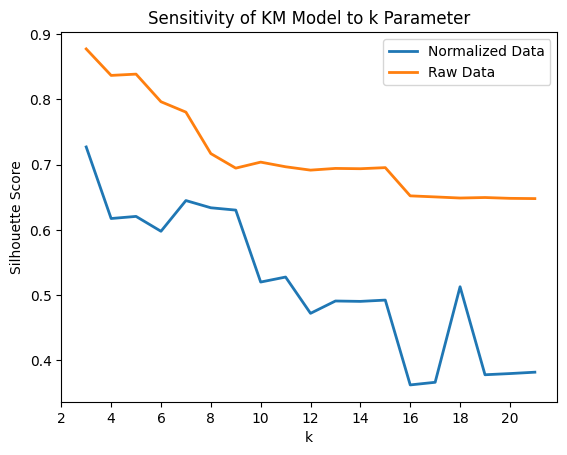

In [30]:
raw_data = plot_sensitivity ()